# Décomposition/Coordination

In [16]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [44]:
#données du problème :

n=50#discretisation

#temps:
t0=0
tf=299
lt=np.linspace(t0,tf,n+1)

#prix
ph=1
pb=0.5

#Intensité
Im=2

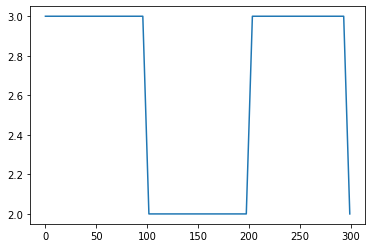

In [45]:
def PrixHoraire(t,ph,pb):
    n=np.floor(t)
    if n%200 < 99:
        return ph
    else:
        return pb
    
VPrixHoraire= np.vectorize(PrixHoraire)
lprix=VPrixHoraire(lt,3,2)
plt.plot(lt,lprix)
plt.show()

In [46]:
#données spécifiques aux véhicules
T=[[30,200],[60,250],[20,150]]#temps de présence des véhicules
Q=[100,100,100]#capacité des batteries des véhicules
C=[[0.1,0.6],[0.3,0.9],[0.1,0.9]] #taux de charge à l'arrivée et à la sortie

K=len(T)#nombre de véhicules

On définit les fonctions de coût spécifiques à chaque véhicules de sorte de $f((x_i^k)_{i,k})=\sum_k f_k((x^k_i)_i)$

I est sous la forme :
$[[y_i^k]]$ avec k les lignes (véhicule) et i la colonne (temps)

In [47]:
def fk(k,I): #cout pour le véhicule k
    S=0
    listeS=[]
    for i in range(n):
        Q=-(lt[i+1]-lt[i])*I[k][i]
        P=PrixHoraire(lt[i],ph,pb) #On suppose ici que l'on ne change pas de prix horaire sur l'intervalle listet[i], listet[i+1]
        S+=P*Q
        listeS.append(S)
    return S,np.array(listeS)

In [48]:
def charge(k,I): #donne la charge pour le véhicule k à tout temps(charge absolue, pas en %)
    c=C[k][0]*Q[k]
    charge=np.zeros(n)
    for i in range (n):
        x=-(lt[i+1]-lt[i])*(I[k][i])
        c+=x
        charge[i]=c
    return charge

In [49]:
def affichage_I(I):
    for k in range(len(I)):
        plt.plot(lt[0:n],I[k],label=f"véhicule {k}")
    plt.legend()
    plt.show()

def affichage_charge(I):
    for k in range(K):
        lcharge=charge(k,I)
        plt.plot(lt[0:n],lcharge,label=f"véhicule {k}")
    plt.legend()
    plt.show()
    
def affichage_prix(I):
    for k in range(K):
        lcout=fk(k,I)[1]
        plt.plot(lt[0:n],lcout,label=f"véhicule {k}")
    plt.legend()
    plt.show()


On définit les contraintes sous la forme $\sum_k c_k((x^k_i)_i)-b<=0$


In [50]:
def c(k):
    ck=np.zeros((2*K+2*n+6*n*K,n))
    
    #chargement(2K)
    for i in range (n):
        ck[k][i]=-(lt[i+1]-lt[i])
        ck[k+1][i]=(lt[i+1]-lt[i])
        
    #borne(2nK)
    for i in range(n):
        ck[2*K+2*n*k+2*i][i]=1
        ck[2*K+2*n*k+2*i+1][i]=-1
        
    #reseau(2n)
    for i in range(n):
        ck[2*K+2*n*K+2*i][i]=1
        ck[2*K+2*n*K+2*1+1][i]=-1
    
    #presence(2nK)
    for i in range(n):
        if lt[i]<T[k][0] or lt[i]>=T[k][1]:#on ne met des contraintes que si le véhicule est absent
            ck[2*K+2*n*K+2*n+2*n*k+2*i][i]=1
            ck[2*K+2*n*K+2*n+2*n*k+2*i+1][i]=-1
            
    #capacité(2nK)
    for i in range(n):#c'est une matrice triangulaire inférieure
        for p in range(i):
            ck[2*K+2*n*K+2*n+2*n*K+2*i][p]=-(lt[p+1]-lt[p])
            ck[2*K+2*n*K+2*n+2*n*K+2*i+1][p]=(lt[p+1]-lt[p])
            
    return ck 

In [51]:
#on définit b
b=np.zeros(2*K+2*n+6*n*K)

#chargement(2K)
for i in range(K):
    b[2*i]=(C[i][1]-C[i][0])*Q[i]
    b[2*i+1]=-(C[i][1]-C[i][0])*Q[i]
    
#borne(2nK)
for i in range(2*n*K):
    b[2*K+i]=Im

#réseau(2n)
for i in range(n):
    b[2*K+2*n*K+2*i]=0
    b[2*K+2*n*K+2*i+1]=Im
    
#présence(2nK)
#il n'y a que des 0

#capacité(2nK)
for k in range(K):
    for i in range(n):
        b[2*K+2*n+4*n*K+2*n*k+2*i]=(1-C[k][0])*Q[k]
        b[2*K+2*n+4*n*K+2*n*k+2*i+1]=0
    


In [52]:
F=np.zeros(n)
for i in range(n):
    F[i]=-(lt[i+1]-lt[i])*PrixHoraire(lt[i],ph,pb) 
#F est le gradient de la foction coût pour la k-ième voiture (remarque : cela est indépendant du véhicule)

In [53]:
def proj(X):
    Y=np.zeros(len(X))
    for i in range (len(X)):
        if X[i]>0:
            Y[i]=X[i]
    return Y
      

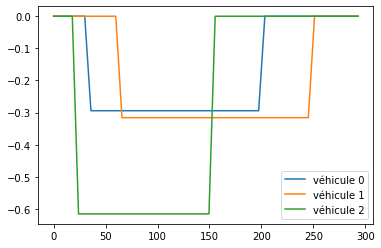

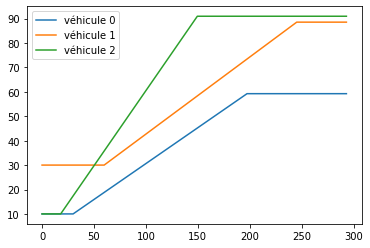

In [54]:
def I0():
    I=np.zeros((K,n))
    for k in range(K):
        Ik=-(C[k][1]-C[k][0])*Q[k]/(T[k][1]-T[k][0])
        for i in range(n):
            if lt[i]>=T[k][0] and lt[i]<T[k][1]:
                I[k][i]=Ik
    return I
affichage_I(I0())
affichage_charge(I0())

In [73]:
Co=[c(k) for k in range(K)]

In [74]:
def algoDC(p=1e-2,l=1e-3,max_iter=1000,epsi=1e-8):
    X=I0()
    m=2*K+2*n+6*n*K
    lamb=np.array([1 for i in range (m)])
    S=np.zeros(m)
    
    for k in range(K):
        ck=Co[k]
        X[k]=X[k]-l*(F+np.dot(lamb,ck))
        S+=np.dot(ck,X[k])
    j=0  
    while j<max_iter and np.linalg.norm(lamb-proj(lamb+p*(S-b)))>epsi:
        lamb=proj(lamb+p*(S-b))
        S=np.zeros(m)
        for k in range(K):
            ck=c(k)
            X[k]=X[k]-l*(F+np.dot(lamb,ck))
            S+=np.dot(ck,X[k])
    
        j+=1
        if j%500==0:
            #affichage_I(X)
            print(j)
    return X   

In [76]:
I=algoDC()


500
1000


In [111]:
def Ir(I):
    Ir=np.zeros((n,1))
    for i in range(n):
        s=0
        for k in range(K):
            s+=I[k][i]
        
        Ir[i]=s
    return Ir

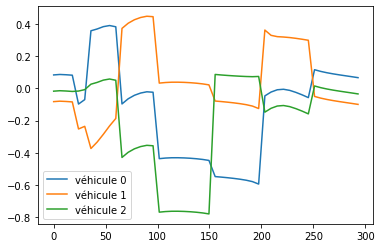

In [65]:
affichage_I(I)

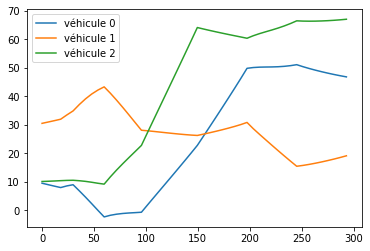

In [66]:
affichage_charge(I)

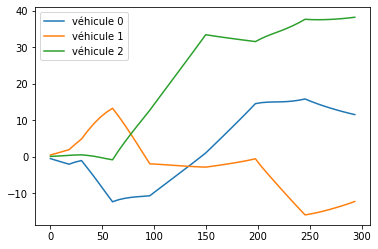

In [67]:
affichage_prix(I)

# Réécriture des contraintes (sous forme égalité)



In [76]:
def ce(k):
    ck=np.zeros((K+n*K+n,n))
    
    #chargement(K)
    for i in range (n):
        ck[k][i]=(lt[i+1]-lt[i])
        
    
    #presence(nK)
    for i in range(n):
        if lt[i]<T[k][0] or lt[i]>=T[k][1]:#on ne met des contraintes que si le véhicule est absent
            ck[K+n*k+i][i]=1
            
    #reseau (n) inégalités donc ajout de variables écarts
    for i in range(n):
        ck[i+n*K+K][i]=1
            
    return ck 

cp=np.zeros((K+n*K+n,n))#matrice de contrainte pour les variables d'écarts
for i in range(n):
    cp[i+K+n*K][i]=1


In [77]:
#on définit b
be=np.zeros(K+n*K+n)

#chargement(K)
for i in range(K):
    be[i]=(C[i][1]-C[i][0])*Q[i]
    
#reseau(nk)
for i in range(n):
    be[K+n*K+i]=Im
    

In [107]:
def algoDCe(p=1e-2,l=1e-3,max_iter=30000,epsi=1e-8):
    X=np.zeros((K+1,n))
    X[:K][:]=-I0()
    for i in range(n):
        s=0
        for k in range(K):
            s+=X[k][i]
        X[K][i]=Im-s
    print(X)
    m=K+n*K+n
    lamb=np.array([1 for i in range (m)])
    S=np.zeros(m)
    
    for k in range(K):
        ck=ce(k)
        X[k]=X[k]-l*(F+np.dot(lamb,ck))
        S+=np.dot(ck,X[k])
    S+=np.dot(cp,X[K])
    j=0  
    while j<max_iter and np.linalg.norm(lamb-proj(lamb+p*(S-be)))>epsi:
        lamb=proj(lamb+p*(S-be))
        S=np.zeros(m)
        for k in range(K):
            ck=ce(k)
            X[k]=X[k]-l*(F+np.dot(lamb,ck))
            S+=np.dot(ck,X[k])
        S+=np.dot(cp,X[K])
        j+=1
        if j%5000==0:
            #affichage_I(-X)
            print(j)
    return X   

In [115]:
Ie=-algoDCe()


[[-0.         -0.         -0.          0.29411765  0.29411765  0.29411765
   0.29411765  0.29411765  0.29411765  0.29411765  0.29411765  0.29411765
   0.29411765  0.29411765 -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [-0.         -0.         -0.         -0.         -0.          0.31578947
   0.31578947  0.31578947  0.31578947  0.31578947  0.31578947  0.31578947
   0.31578947  0.31578947  0.31578947  0.31578947  0.31578947 -0.
  -0.         -0.        ]
 [-0.         -0.          0.61538462  0.61538462  0.61538462  0.61538462
   0.61538462  0.61538462  0.61538462  0.61538462  0.61538462 -0.
  -0.         -0.         -0.         -0.         -0.         -0.
  -0.         -0.        ]
 [ 2.          2.          1.38461538  1.09049774  1.09049774  0.77470826
   0.77470826  0.77470826  0.77470826  0.77470826  0.77470826  1.39009288
   1.39009288  1.39009288  1.68421053  1.68421053  1.68421053  2.
   2.          2.        ]]
5000
10000
15000
20000
25000
30000


In [116]:
ir=Ir(Ie)
for i in range(n):
    
    Ie[K][i]=ir[i]

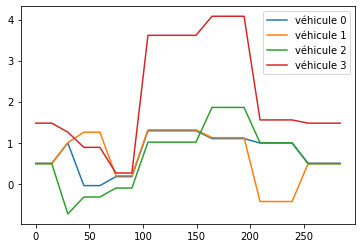

In [117]:
affichage_I(Ie)

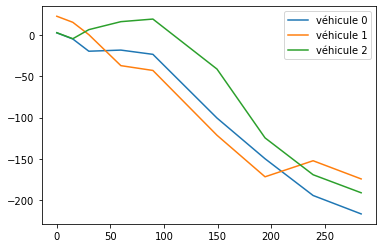

In [118]:
affichage_charge(Ie)